<a href="https://colab.research.google.com/github/nefetorve/big_data/blob/master/07_uczenie_glebokie/03_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12,suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0'

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

(-0.5, 27.5, 27.5, -0.5)

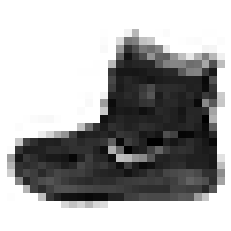

In [6]:
plt.imshow(X_train[0],cmap='gray_r')
plt.axis('off')

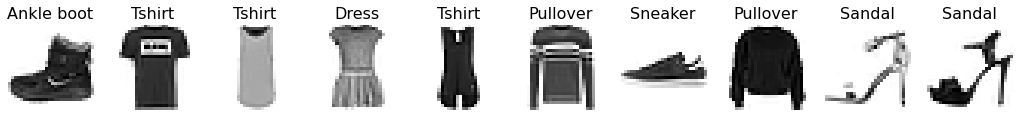

In [7]:
class_names = ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18,13))
for i in range(1,11): 
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [8]:
X_train = X_train /255.
X_test = X_test /255.

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5272 - accuracy: 0.8127 - val_loss: 0.4262 - val_accuracy: 0.8523
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3879 - accuracy: 0.8624 - val_loss: 0.3887 - val_accuracy: 0.8635
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3526 - accuracy: 0.8739 - val_loss: 0.3791 - val_accuracy: 0.8683
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3330 - accuracy: 0.8811 - val_loss: 0.3919 - val_accuracy: 0.8625
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3164 - accuracy: 0.8867 - val_loss: 0.3416 - val_accuracy: 0.8840
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3054 - accuracy: 0.8909 - val_loss: 0.3560 - val_accuracy: 0.8826
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2949 - accuracy: 0.8959 - val_loss: 0.3802 - val_accuracy:

In [12]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.527203,0.812667,0.426194,0.852333,0
1,0.387882,0.862437,0.388713,0.863500,1
2,0.352587,0.873854,0.379143,0.868333,2
3,0.333016,0.881125,0.391938,0.862500,3
4,0.316400,0.886729,0.341564,0.884000,4
5,0.305434,0.890875,0.355995,0.882583,5
6,0.294906,0.895896,0.380185,0.881667,6
7,0.287831,0.898500,0.382007,0.882500,7
8,0.280433,0.900813,0.376075,0.886750,8
9,0.275491,0.904167,0.391141,0.880333,9


In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8671000003814697


In [17]:
predictions = model.predict(X_test)
predictions

array([[0.000000024631, 0.000000000002, 0.000000006651, ..., 0.00153946    , 0.000000003404, 0.9975573     ],
       [0.000000256084, 0.            , 0.9997609     , ..., 0.            , 0.            , 0.            ],
       [0.000000000001, 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.00650157    , 0.            , 0.003242739   , ..., 0.000000001385, 0.98900175    , 0.            ],
       [0.000000000112, 0.9999963     , 0.            , ..., 0.000000000004, 0.000000000001, 0.000000000011],
       [0.000001825974, 0.000000048185, 0.000030439289, ..., 0.0073724724  , 0.0023327442  , 0.00009165933 ]], dtype=float32)

In [18]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000903,0.000000,0.001539,0.000000,0.997557
1,0.000000,0.000000,0.999761,0.000000,0.000006,0.000000,0.000233,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.041824,0.000000,0.001385,0.000008,0.000052,0.000000,0.956732,0.000000,0.000000,0.000000


In [21]:
predictions_cls = np.argmax(model.predict((X_test)), axis=-1) 
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

In [33]:
#@title Wybierz indeks zdjęcia

idx = 1140 #@param {type:'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
  color='green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] *255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [43]:

#@title Wybierz indeks zdjęcia
misclassified = []

for idx, _ in enumerate(X_test):
  if predictions_cls[idx] != y_test[idx]:
    misclassified.append(idx)

index_mapper = {}

for idx,idx_real in enumerate(misclassified):
  index_mapper[idx] = idx_real

idx = 644 #@param {type:'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[index_mapper[idx]], orientation='v', 
                     marker_color='red'))
fig.update_layout(width=600, height=300,
                  title=(f'Etykieta: {class_names[predictions_cls[idx]]}'
                  f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))

fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] *255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)